In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [6]:
data = pd.read_csv("data/combined_stats.csv", index_col=0)
# Missing column is awards_per (useless)
data.columns[0:100]

relevant_players = data[(data['MP_g'] > 15) & (data['G'] > 20)]

In [10]:
adv_cols = ['Player', 'Fpoints_avg_G', 'Fpoints_avg_min', 'Fpoints_per36', 'STL%', 'BLK%', 'USG%', '3PAr', 'FTr', 'TRB%', 
               'OWS', 'DWS', 'WS/48', 'BPM', 'VORP']

adv_data = relevant_players[adv_cols]

adv_data.sort_values(by = 'Fpoints_avg_G', ascending = False).head(50)
            


,Player,Fpoints_avg_G,Fpoints_avg_min,Fpoints_per36,STL%,BLK%,USG%,3PAr,FTr,TRB%,OWS,DWS,WS/48,BPM,VORP
1,Luka Dončić,63.9,1.704000,61.344000,1.8,1.3,36.0,0.450,0.368,13.5,8.5,3.5,0.220,9.9,8.0
11,Nikola Jokić,63.0,1.820809,65.549133,2.0,2.1,29.3,0.164,0.310,19.8,12.0,5.1,0.299,13.2,10.6
0,Joel Embiid,62.1,1.848214,66.535714,1.7,4.6,39.6,0.163,0.531,18.1,5.2,2.3,0.275,11.6,4.5
2,Giannis Antetokounmpo,58.3,1.656250,59.625000,1.6,2.6,33.0,0.091,0.571,17.9,9.5,3.7,0.246,9.0,7.2
3,Shai Gilgeous-Alexander,56.8,1.670588,60.141176,2.8,2.4,32.8,0.181,0.436,9.1,10.5,4.2,0.275,9.0,7.1
18,Anthony Davis,55.1,1.552113,55.876056,1.6,5.7,26.7,0.083,0.402,19.8,7.2,4.7,0.210,5.1,4.9
14,LeBron James,51.8,1.467422,52.827195,1.7,1.3,29.2,0.286,0.318,11.5,5.7,2.8,0.164,6.5,5.4
46,Victor Wembanyama,51.2,1.723906,62.060606,2.0,10.0,32.2,0.332,0.309,19.4,-0.7,4.4,0.085,5.2,3.8
63,Tyrese Haliburton,50.3,1.562112,56.236025,1.8,1.7,24.6,0.510,0.217,6.9,7.6,1.5,0.195,6.9,5.0
81,Domantas Sabonis,50.2,1.406162,50.621849,1.2,1.5,22.2,0.081,0.389,21.4,8.6,4.0,0.206,6.5,6.2


/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_50214/2333302274.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(adv_data.corr(), annot=True, vmin = -1, vmax = 1)


<Figure size 3000x3000 with 0 Axes>

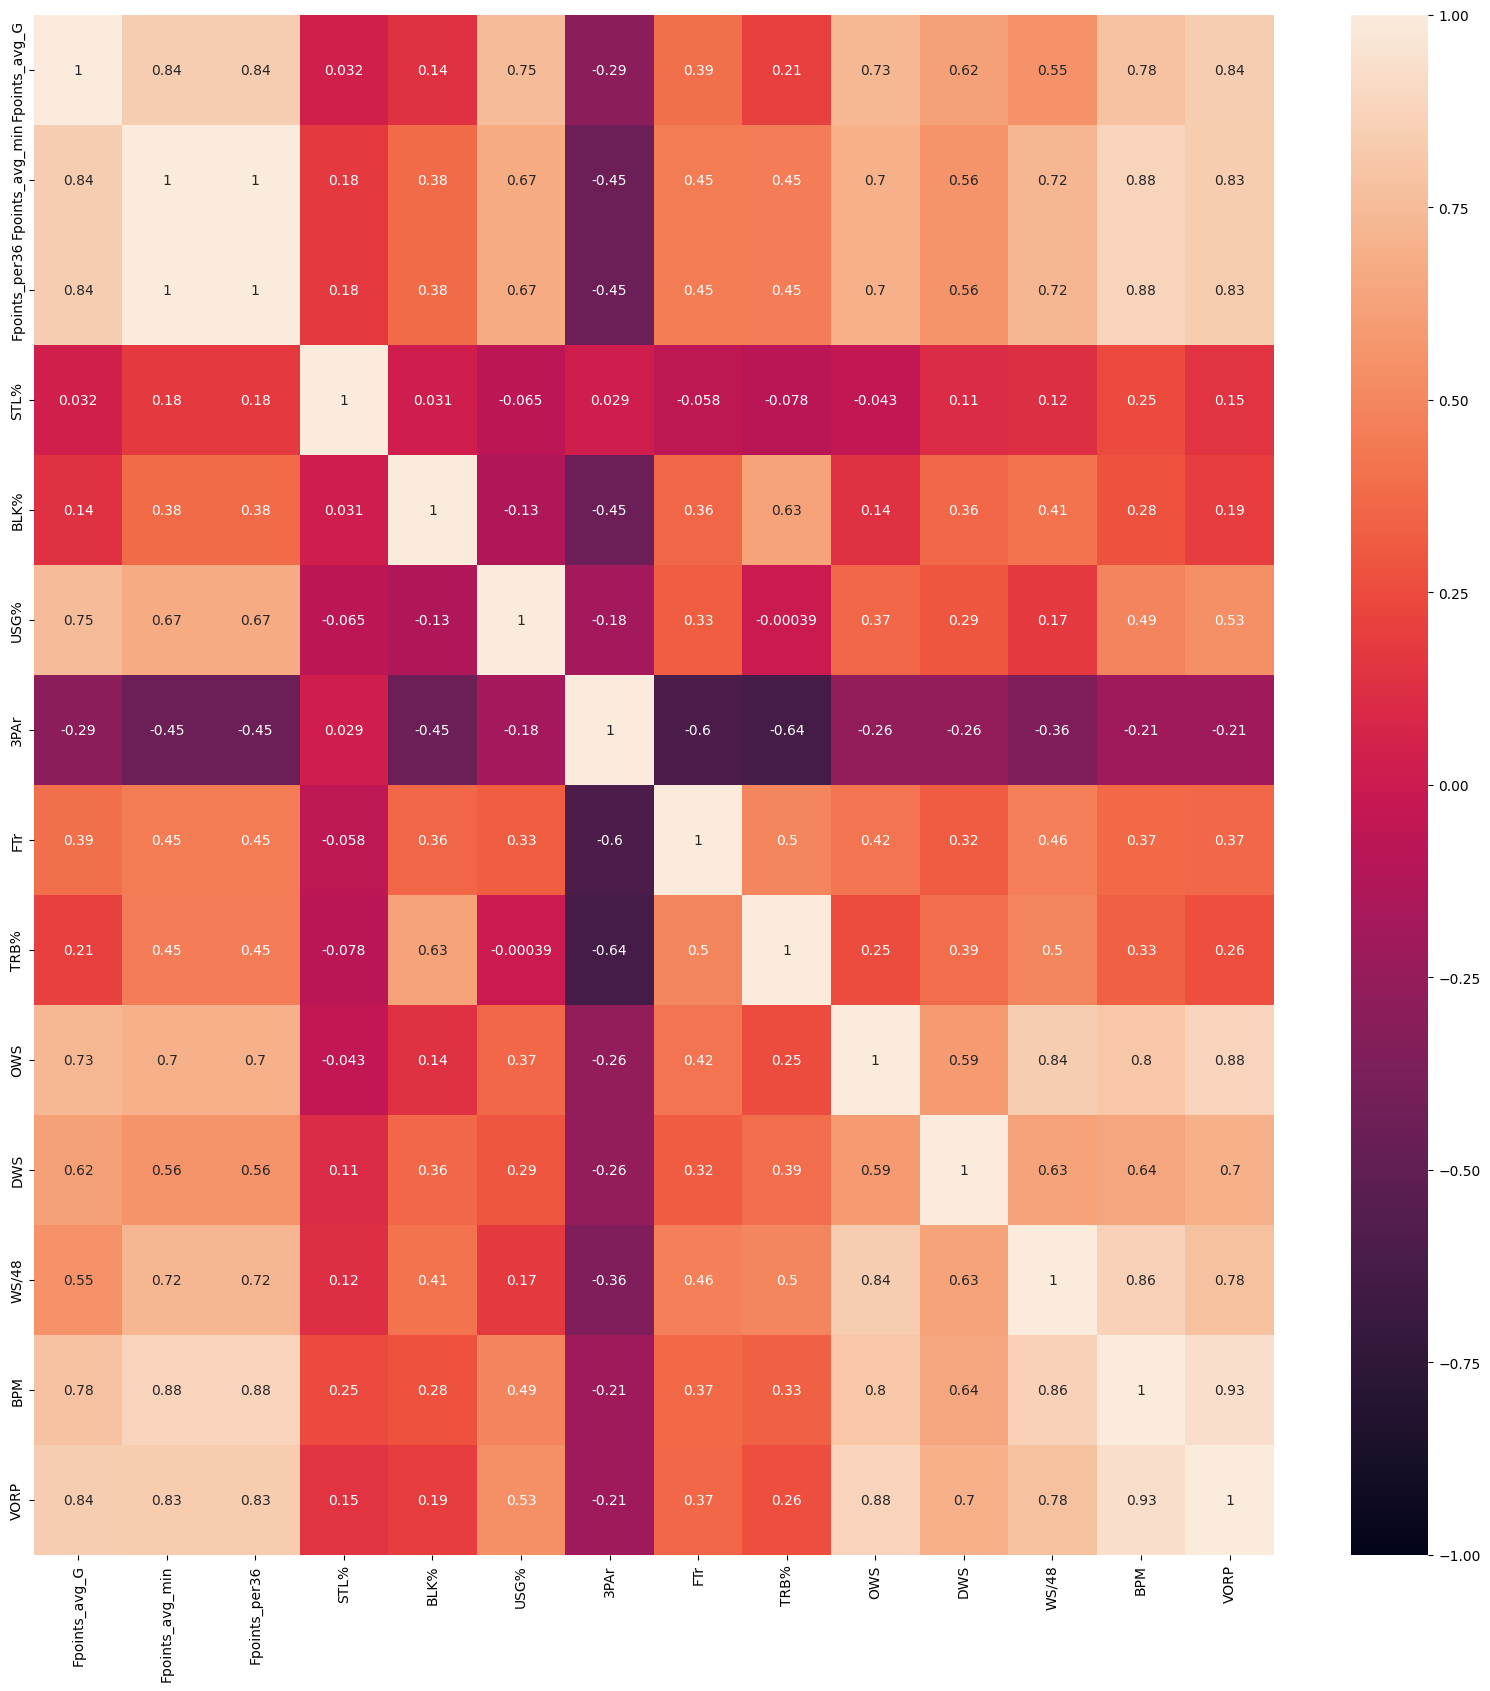

<Figure size 3000x3000 with 0 Axes>

In [12]:
plt.figure(figsize=(20,20))
sn.heatmap(adv_data.corr(), annot=True, vmin = -1, vmax = 1)
plt.figure(figsize=(30,30))

In [14]:


# Ensure the output is displayed in the notebook (if you're using one)
output_notebook()

def plot_scatter_tooltip(data, x, y):
    source = ColumnDataSource(data)
    p = figure(title="Scatter Plot of Fpoints_avg_min vs VORP",
               x_axis_label=x,
               y_axis_label=y,
               tools="pan,wheel_zoom,box_zoom,reset")
    p.scatter(x='Fpoints_avg_min', y='VORP', size=10, source=source)
    hover = HoverTool()
    hover.tooltips = [("Player", "@Player"), ("Fpoints_avg_min", "@Fpoints_avg_min"), ("VORP", "@VORP")]
    p.add_tools(hover)
    show(p)
    
plot_scatter_tooltip(adv_data, 'Fpoints_avg_min', 'VORP')


Loading BokehJS ...

<AxesSubplot: xlabel='Age_g', ylabel='PTS_g'>

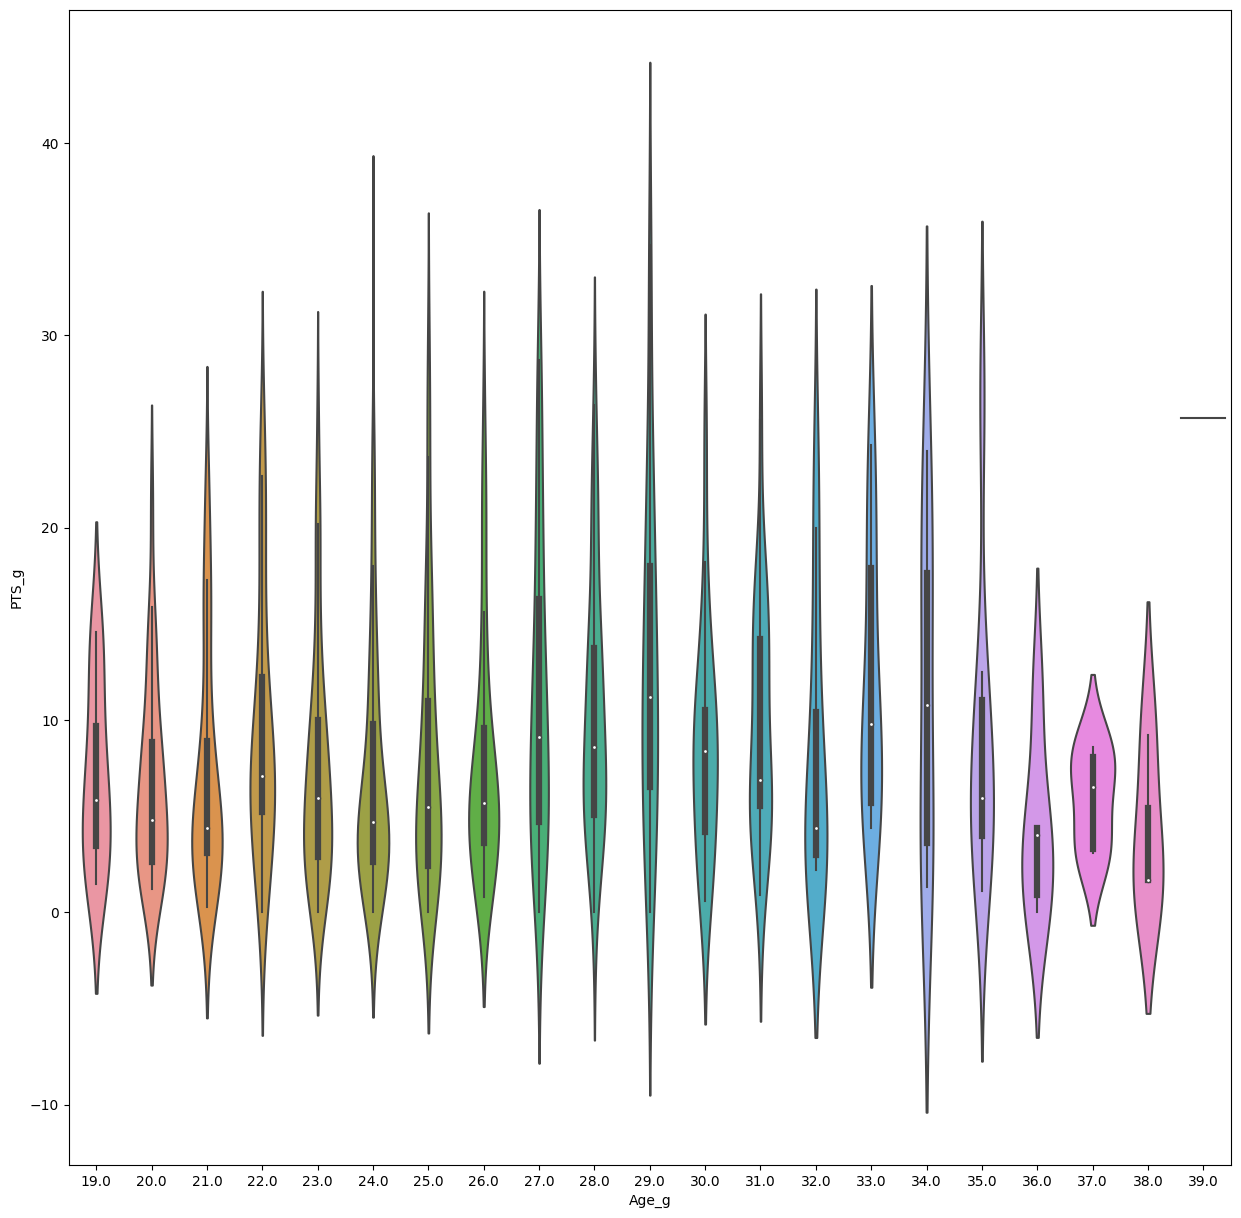

In [9]:
plt.figure(figsize=(15,15))
sn.violinplot(data=data, x='Age_g', y='PTS_g')